Выборка номер 31

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from scipy.stats import norm as norm_distr, nct as stud_distr, chi2 as hi2_distr, f as fisher_distr
sns.set(style="ticks", context="talk")

## Задание 1

По числовой выборке № 1 объема 50 построить точные доверительные интервалы c уровнями доверия 0.99, 0.95 и 0.9, считая, что выборка взята из нормального распределения с параметрами $α$ и $σ^2$:\
a) для α, если $σ^2$ известно;\
б) для α, если $σ^2$ неизвестно;\
в) для $σ^2$, если α известно;\
г) для $σ^2$, если α неизвестно.


In [123]:
# Нормальное распределение
alpha = 0
sigma2 = 0.9
accs = ['0.99','0.95', '0.90']

X_n = np.array([-0.873, -0.153, -0.544,  0.442, -0.043, -0.741, -0.806, -0.622, -0.574, -1.048,
                -1.197, -0.994,  0.407, -0.253, -0.075,  0.968, -2.027,  2.466,  1.328,  0.336,
                -0.895, -1.518, -0.275, -0.837, -0.303, -0.702,  0.047,  0.325,  0.980, -0.837,
                -0.173, -0.697, -1.153, -0.281,  1.121,  0.205,  0.281, -0.266, -0.180, -0.667,
                -0.058, -1.203, -1.611,  1.618,  1.938, -1.447,  1.347,  1.308,  0.107, -1.411])

<!-- Ниже мы расччитаем\
$\overline{X}$ - выборочное среднее,\
$S^2$ - выборочную дисперсую,\
$S_{0}^2$ - несмещенное выборочное стандартное отклонение (двумя способами)\
\
По следствию из леммы Фишера
$\frac{(n-1)S_{0}^2}{\sigma^2}⋹\chi_{n-1}^{2}$\
\
Пусть $t_{\varepsilon}^{(1)}$ и $t_{\varepsilon}^{(2)}$ - квантили распределения $\chi_{n-1}^{2}$ уровней $\varepsilon/2 и $1-\varepsilon/2$ соответственно. Тогда ${1-ε/2}$ = P(t_{\varepsilon}^{(1)<\frac{(n-1)S_{0}^2}{\sigma^2}<t{\varepsilon}^{(2)}) = P(\frac)$$

---

Курсив Курсив *Курсив* -->

In [124]:
n = X_n.size

# выборочное среднее
X_ = np.average(X_n)

# выборочная дисперсия
S2 = np.average(X_n * X_n) - X_ ** 2  

# несмещенная выборочная дисперсия
S2_0 = S2 * n / (n - 1) 

# выборочная дисперсия при известном среднем
S2_1 = sum((X_n - alpha * np.ones(n)) ** 2) / n

# print('S2:\t', S2)
# print('X_:\t', X_)
# print('S2_0:\t', S2_0)
# print('S2_1:\t', S2_1)

a) Для построения интервала на $α$ при известном $σ^2$ можно воспользоваться тем, что $\sqrt{n}\frac{\overline{X} - \alpha}{\sigma}⋹N_{0,1}$

In [125]:
# считаем квантили стандартного нормального распределения (с точностью .3)
q_norm = [round(norm_distr.ppf(1 - 0.01 / 2), 3),
          round(norm_distr.ppf(1 - 0.05 / 2), 3), 
          round(norm_distr.ppf(1 - 0.1 / 2), 3)]

In [126]:
print('а) интервалы для alpha, когда sigma известна:')
for q, accuracy in zip(q_norm, accs):
    shift = q * sqrt(S2_1) / sqrt(n)
    print(f'при точности {accuracy} ({X_ - shift:.3f}, {X_ + shift:.3f}), длина {2*shift:.3f}')

а) интервалы для alpha, когда sigma известна:
при точности 0.99 (-0.542, 0.172), длина 0.714
при точности 0.95 (-0.457, 0.087), длина 0.544
при точности 0.90 (-0.413, 0.043), длина 0.456


б) Для построения интервала на $α$ при неизвестном $σ^2$ можно воспользоваться следствием леммы Фишера: $\sqrt{n}\frac{\overline{X} - \alpha}{S}⋹T_{n-1}$

In [127]:
# считаем квантили распределения Стьюдента с 49 степенями свободы (с точностью .3)
st = stud_distr(df = n - 1, nc = 0)
q_stud = [round(st.ppf(1 - 0.01 / 2), 3),
          round(st.ppf(1 - 0.05 / 2), 3),
          round(st.ppf(1 - 0.1 / 2), 3)]

In [128]:
print('б) интервалы для alpha, когда sigma не известна:')
for q, accuracy in zip(q_stud, accs):
    shift = q * sqrt(S2_0) / sqrt(n)
    print(f'при точности {accuracy} ({X_ - shift:.3f}, {X_ + shift:.3f}), длина {2*shift:.3f}')

б) интервалы для alpha, когда sigma не известна:
при точности 0.99 (-0.553, 0.184), длина 0.737
при точности 0.95 (-0.461, 0.092), длина 0.553
при точности 0.90 (-0.416, 0.046), длина 0.461


в) Для построения интервала на $σ^2$ при известном $\alpha$ можно воспользоваться одним из следствий леммы Фишера: $\frac{nS_{1}^2}{σ^2}⋹H_{n}$

In [129]:
# считаем квантили распределения Хи-квадрат с 50 степенями свободы (с точностью .3)
ch = hi2_distr(df=n)
q_ch50 = [(round(ch.ppf(0.01 / 2), 3), round(ch.ppf(1 - 0.01 / 2), 3)),
          (round(ch.ppf(0.05 / 2), 3), round(ch.ppf(1 - 0.05 / 2), 3)),
          (round(ch.ppf(0.1 / 2), 3),  round(ch.ppf(1 - 0.1 / 2),  3))]

In [130]:
print('в) интервалы для sigma, когда alpha известна:')
for i, accuracy in zip(range(3), accs):
    L = n*S2_1/q_ch50[i][1]
    R = n*S2_1/q_ch50[i][0]
    print(f'при точности {accuracy} ({L:.3f}, {R:.3f}), длина {R - L:.3f}')

в) интервалы для sigma, когда alpha известна:
при точности 0.99 (0.605, 1.718), длина 1.113
при точности 0.95 (0.673, 1.486), длина 0.813
при точности 0.90 (0.712, 1.383), длина 0.671


г) Для построения интервала на $σ^2$ при неизвестном $\alpha$ можно воспользоваться следствием леммы Фишера: $\frac{(n-1)S_{0}^2}{σ^2}⋹H_{n-1}$

In [131]:
# считаем квантили распределения Хи-квадрат с 49 степенями свободы (с точностью .3)
ch = hi2_distr(df=n-1)
q_ch49 = [(round(ch.ppf(0.01 / 2), 3), round(ch.ppf(1 - 0.01 / 2), 3)),
          (round(ch.ppf(0.05 / 2), 3), round(ch.ppf(1 - 0.05 / 2), 3)),
          (round(ch.ppf(0.1 / 2), 3),  round(ch.ppf(1 - 0.1 / 2),  3))]

In [132]:
print('в) интервалы для sigma, когда alpha не известна:')
for i, accuracy in zip(range(3), accs):
    L = (n-1)*S2_0/q_ch49[i][1]
    R = (n-1)*S2_0/q_ch49[i][0]
    print(f'при точности {accuracy} ({L:.3f}, {R:.3f}), длина {R - L:.3f}')

в) интервалы для sigma, когда alpha не известна:
при точности 0.99 (0.593, 1.702), длина 1.109
при точности 0.95 (0.660, 1.469), длина 0.809
при точности 0.90 (0.699, 1.367), длина 0.668


## Задание 2

In [133]:
# Равномерное распределение
a = 0
b = 1
eps = 0.11

X_u = np.array([0.696, 0.920, 0.120, 0.195, 0.635, 0.752, 0.148, 0.589, 0.341, 0.282, 
                0.499, 0.312, 0.150, 0.091, 0.322, 0.113, 0.578, 0.352, 0.187, 0.127, 
                0.496, 0.132, 0.789, 0.347, 0.175, 0.081, 0.558, 0.593, 0.826, 0.539])

По числовой выборке № 2 объема 30\
а) построить график эмпирической функции распределения и гистограмму;\
б) проверить основную гипотезу о равномерности распределения c помощью критерия Колмогорова;\
в) проверить основную гипотезу о равномерности распределения c помощью критерия хи-квадрат

In [134]:
n = X_u.size
X_u_sorted = np.sort(X_u)

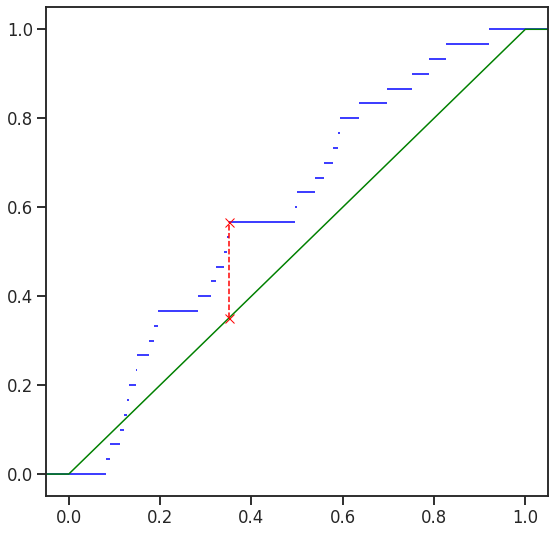

In [139]:
#строим графики эмпирического и истинного распределений
plt.figure(figsize=(9, 9))
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
tmp = np.where(X_u_sorted <= X_u_sorted)[0]/n
plt.hlines(0, -1, X_u_sorted[0], linewidth=1.5, color='blue')
plt.hlines(1, X_u_sorted[n-1], 2, linewidth=1.5, color='blue')
for j in range(n - 1): plt.hlines(tmp[j + 1], X_u_sorted[j], X_u_sorted[j + 1], linewidth=1.5, color='blue')
plt.plot([-1, 0, 1, 2], [0, 0, 1, 1], linewidth=1.5, color='green')

# находим и отмечаем статистическое расстояние между функциями распределений
D = max(max(abs(tmp - X_u_sorted)), abs(X_u_sorted[0]), abs(1-X_u_sorted[n-1]))
for elem, i in zip(tmp, range(len(tmp))):
  if abs(X_u_sorted[i]-elem) == D:
    plt.plot([X_u_sorted[i], X_u_sorted[i]], [X_u_sorted[i], tmp[i+1]], linewidth=1.5, color='red', marker='x', ls='--')

In [136]:


# print('Выборочное среднее: ', np.average(X_u))

# # Количество интервалов для критерия Хи-квадрат
# K = 5

# #Табличка для РДУЗ: http://smc.edu.nstu.ru/krit_kolm.htm

# q_k = 1.17  # Кванитиль уровня 1 - 0.13 = 1 - eps | K^-1(0.13) = 1.17 | K(1.17) = 0.87

# ch_u = hi2_distr(df=K - 1)
# q_ch_u = ch_u.ppf(1 - eps)
# print('Квантиль Хи-квадрат уровня 1-eps:', q_ch_u)

In [137]:
# #б (Критерий Хи-квадрат):

# def getMu(Split):
#     Mu = []
#     c = 0;
#     i = 0
#     for s in Split:
#         while Xu[i] <= s:
#             c += 1;
#             if i < n - 1:
#                 i += 1
#             else:
#                 break
#         Mu.append(c);
#         c = 0

#     return Mu[1:]


# Spl = np.linspace(0, 1, K + 1)  #Равномерное разбиение
# p = Spl[1]  #Вероятность попасть в один из интервалов
# M = getMu(Spl)  #Количество элементов выборки в каждом из интервалов

# # print(Xu)
# print('Разбиение [0,1]:', Spl)
# print('\nКоличество точек в каждом интервале разбиения:', M)
# print('\nЭмпирическая функция распределения: \n', Array_F_empirical,'\n')

# #Статистика Хи-квадрат
# D = 0
# n_p = n * p
# for i in range(K):
#     D += (M[i] - n_p) ** 2
# D /= (n_p)

# if D < q_ch_u:
#     print("Выборка равномерная")
# else:
#     print("Выборка не равномерная")

# print("Квантиль:", round(q_ch_u, 3))
# print("d:", round(D, 3));
# print("РДУЗ:", 1 - ch.cdf(D))


# fig, ax = plt.subplots()

# ax.bar(Spl[:-1:], M, width = 0.15)

# fig.set_figwidth(12)    #  ширина Figure
# fig.set_figheight(6)    #  высота Figure

## Задание 3